In [1]:
import warnings
from glob import glob
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
#from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
#from sklearn.impute import SimpleImputer
#from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
#from sklearn.metrics import mean_absolute_error
#from sklearn.pipeline import make_pipeline
#from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

## ACTION1:  Source of inputs

In [2]:
import pandas as pd
import glob

def wrangle(filepath):
    df = pd.read_csv(filepath)

    # Replace specific values with 0
    df.fillna(0, inplace=True)
    df.replace('_', 0, inplace=True)
    df.replace('-', 0, inplace=True)
   
    return df


data_pattern = r"C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_*.csv"

# Use glob to find the file paths
files = glob.glob(data_pattern)

# Create a list to store DataFrames
frames = []

# Iterate over the files and apply the wrangle function
for file in files:
    df = wrangle(file)
    print(f"Processing {file}, df_shape: {df.shape}")
    frames.append(df)

Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_1.csv, df_shape: (162, 7)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_10.csv, df_shape: (42, 5)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_11.csv, df_shape: (30, 4)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_12.csv, df_shape: (27, 3)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_13.csv, df_shape: (30, 6)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_14.csv, df_shape: (30, 6)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_2.csv, df_shape: (180, 4)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_3.csv, df_shape: (90, 3)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_4.csv, df_shape: (98, 3)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_5.csv, df_shape: (1677, 4)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_6.csv, df_shape: (90, 3)
Processing C:\Users\fabiola\Desktop\HACKTONSSS\Data\Table_7.csv, df_shape: (68

In [3]:
frames[1].head()

Source_of_input Season  Percent_impoved_seed  Percent_org_fertilizer  Year
0  NGOs/Companies      A                 39.30                    3.60  2021
1  NGOs/Companies      B                 30.30                    3.50  2021
2  NGOs/Companies      C                  2.70                    1.70  2021
3  NGOs/Companies      A                 41.22                    2.24  2022
4  NGOs/Companies      B                 23.86                    2.45  2022

## Sewing date will be introduced in Day3 file

In [4]:

df1=frames[1]
df1.head()

Source_of_input Season  Percent_impoved_seed  Percent_org_fertilizer  Year
0  NGOs/Companies      A                 39.30                    3.60  2021
1  NGOs/Companies      B                 30.30                    3.50  2021
2  NGOs/Companies      C                  2.70                    1.70  2021
3  NGOs/Companies      A                 41.22                    2.24  2022
4  NGOs/Companies      B                 23.86                    2.45  2022

In [5]:
df1.columns

Index(['Source_of_input', 'Season', 'Percent_impoved_seed',
       'Percent_org_fertilizer', 'Year'],
      dtype='object')

In [6]:
seasonA = df1[(df1['Season'] == 'A') & (df1['Year'] == 2022)]
seasonA.head(10)
seasonA.columns

Index(['Source_of_input', 'Season', 'Percent_impoved_seed',
       'Percent_org_fertilizer', 'Year'],
      dtype='object')

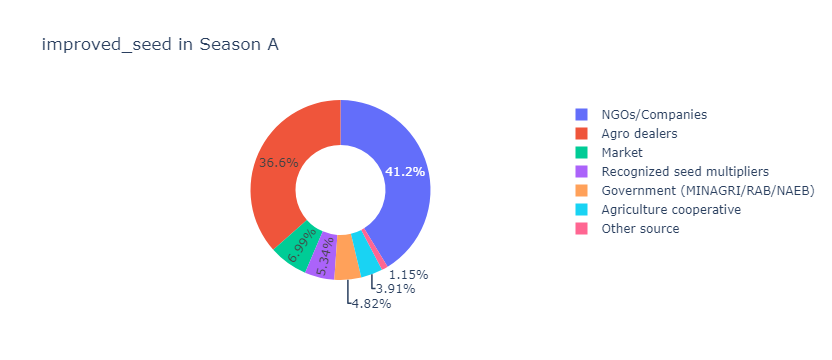

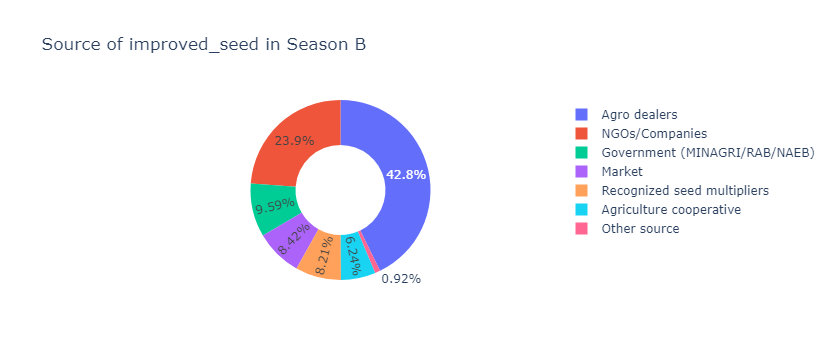

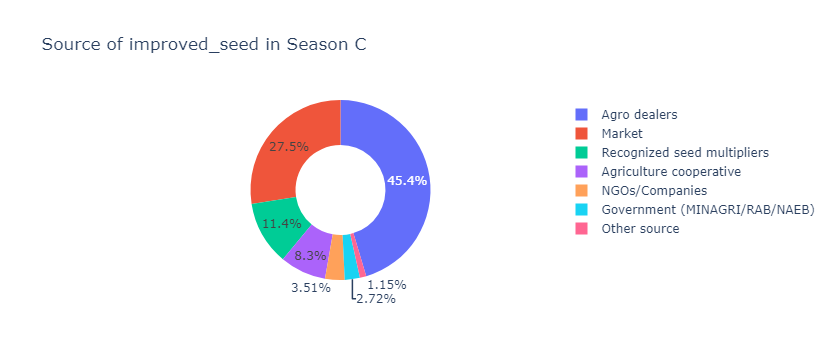

In [7]:

df = pd.DataFrame(df1)

# Filter data for each season
seasonA = df[(df['Season'] == 'A') & (df['Year'] == 2022)]
seasonB = df[(df['Season'] == 'B') & (df['Year'] == 2022)]
seasonC = df[(df['Season'] == 'C') & (df['Year'] == 2022)]

# Create a donut chart for each season
figA = px.pie(seasonA, 
              names='Source_of_input', 
              values='Percent_impoved_seed',
              hole=0.5,
              title='improved_seed in Season A')

figB = px.pie(seasonB, 
              names='Source_of_input', 
              values='Percent_impoved_seed',
              hole=0.5,
              title='Source of improved_seed in Season B')

figC = px.pie(seasonC, 
              names='Source_of_input', 
              values='Percent_impoved_seed',
              hole=0.5,
              title='Source of improved_seed in Season C')

# Show the charts
figA.show()
figB.show()
figC.show()


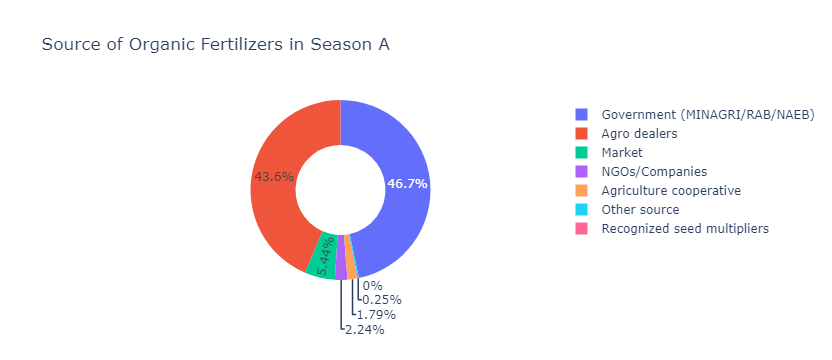

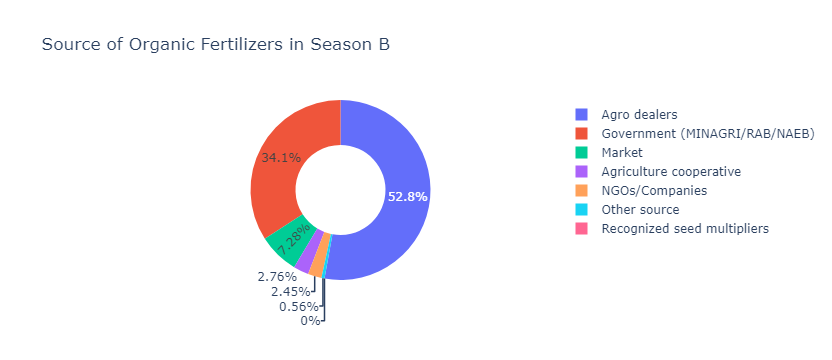

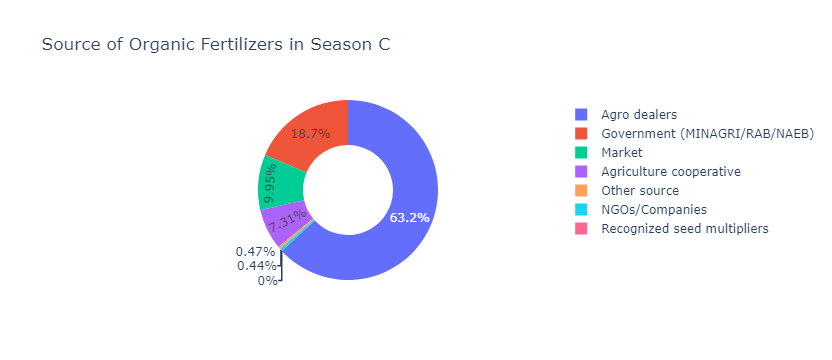

In [8]:
df = pd.DataFrame(df1)

# Filter data for each season
seasonA = df[(df['Season'] == 'A') & (df['Year'] == 2022)]
seasonB = df[(df['Season'] == 'B') & (df['Year'] == 2022)]
seasonC = df[(df['Season'] == 'C') & (df['Year'] == 2022)]

# Create a donut chart for each season
figA = px.pie(seasonA, 
              names='Source_of_input', 
              values='Percent_org_fertilizer',
              hole=0.5,
              title='Source of Organic Fertilizers in Season A')

figB = px.pie(seasonB, 
              names='Source_of_input', 
              values='Percent_org_fertilizer',
              hole=0.5,
              title='Source of Organic Fertilizers in Season B')

figC = px.pie(seasonC, 
              names='Source_of_input', 
              values='Percent_org_fertilizer',
              hole=0.5,
              title='Source of Organic Fertilizers in Season C')

# Show the charts
figA.show()
figB.show()
figC.show()


## ACTION2: AGRICULTURAL PRACTICE

In [9]:
df2=frames[2]


In [10]:
df2.columns

Index(['District', 'Against_erosion', 'Irrigation', 'Agro_forestry'], dtype='object')

In [11]:
df2['District'] = df2['District'].astype(str)
df2.sort_values('District', inplace=True)


In [12]:
df2.head(31)

District  Against_erosion  Irrigation  Agro_forestry
0      Bugesera             80.29       17.50          63.26
1        Burera             92.42        0.40          37.12
2       Gakenke             98.27        2.98          61.13
3        Gasabo             89.67        9.42           0.00
4       Gatsibo             95.99        6.70          68.02
5       Gicumbi             95.02        3.15          42.03
6      Gisagara             90.20       15.08          51.70
7          Huye             95.04       16.23          51.92
8       Kamonyi             93.28       13.03          45.16
9       Karongi             94.59        5.88          56.80
10      Kayonza             74.79       18.68          54.40
11     Kicukiro             64.42       12.98          74.47
12       Kirehe             84.27       10.96          65.30
13      Muhanga             97.29        6.83          49.26
14      Musanze             91.37        0.40          60.46
15        Ngoma             90.03       10.50          71.78
16    Ngororero             97.30        0.97          46.71
17      Nyabihu             98.43        1.34          73.55
18    Nyagatare             83.66        7.41          54.62
19    Nyamagabe             99.51        4.61          48.17
20   Nyamasheke             97.91        3.94          63.93
21       Nyanza             97.07       13.50          43.12
22   Nyarugenge             76.80       11.86          68.22
23    Nyaruguru             97.38        3.21          55.45
24       Rubavu             93.83        0.00          50.23
25      Ruhango             95.41        9.94          55.50
26      Rulindo             93.45       15.12          58.17
27       Rusizi             93.13        7.74          60.22
28      Rutsiro             97.28        0.74          57.20
29    Rwamagana             96.60       14.09          76.76

In [13]:

path = r"C:\Users\fabiola\Desktop\TODAY\DATASET\data\map.csv"
map_df = pd.read_csv(path)


In [14]:
merg=pd.concat([df2,map_df], axis=1)

In [15]:
merg.shape

(30, 7)

In [16]:
merg.head()


District  Against_erosion  Irrigation  Agro_forestry District       lat  \
0   Bugesera             80.29       17.50          63.26  bugesera -2.23456   
1     Burera             92.42        0.40          37.12    burera -1.47394   
2    Gakenke             98.27        2.98          61.13   gakenke -1.69810   
3     Gasabo             89.67        9.42           0.00    gasabo -1.88470   
4    Gatsibo             95.99        6.70          68.02   gatsibo -1.59185   

        lon  
0  30.14825  
1  29.83468  
2  29.78543  
3  30.13141  
4  30.45535

In [17]:
# Assuming your DataFrame is named 'merged'
columns_to_keep = [0, 1, 2, 3, 5, 6]  # Specify the positions of columns to keep
merg = merg.iloc[:, columns_to_keep]

# Display the modified DataFrame
print(merg)


        District  Against_erosion  Irrigation  Agro_forestry      lat  \
0      Bugesera             80.29       17.50          63.26 -2.23456   
1        Burera             92.42        0.40          37.12 -1.47394   
2       Gakenke             98.27        2.98          61.13 -1.69810   
3        Gasabo             89.67        9.42           0.00 -1.88470   
4       Gatsibo             95.99        6.70          68.02 -1.59185   
5       Gicumbi             95.02        3.15          42.03 -1.61647   
6      Gisagara             90.20       15.08          51.70 -2.61811   
7          Huye             95.04       16.23          51.92 -2.51704   
8       Kamonyi             93.28       13.03          45.16 -2.00521   
9       Karongi             94.59        5.88          56.80 -2.12960   
10      Kayonza             74.79       18.68          54.40 -1.85101   
11     Kicukiro             64.42       12.98          74.47 -2.00391   
12       Kirehe             84.27       10.96      

In [18]:
merg.head()

District  Against_erosion  Irrigation  Agro_forestry      lat       lon
0   Bugesera             80.29       17.50          63.26 -2.23456  30.14825
1     Burera             92.42        0.40          37.12 -1.47394  29.83468
2    Gakenke             98.27        2.98          61.13 -1.69810  29.78543
3     Gasabo             89.67        9.42           0.00 -1.88470  30.13141
4    Gatsibo             95.99        6.70          68.02 -1.59185  30.45535

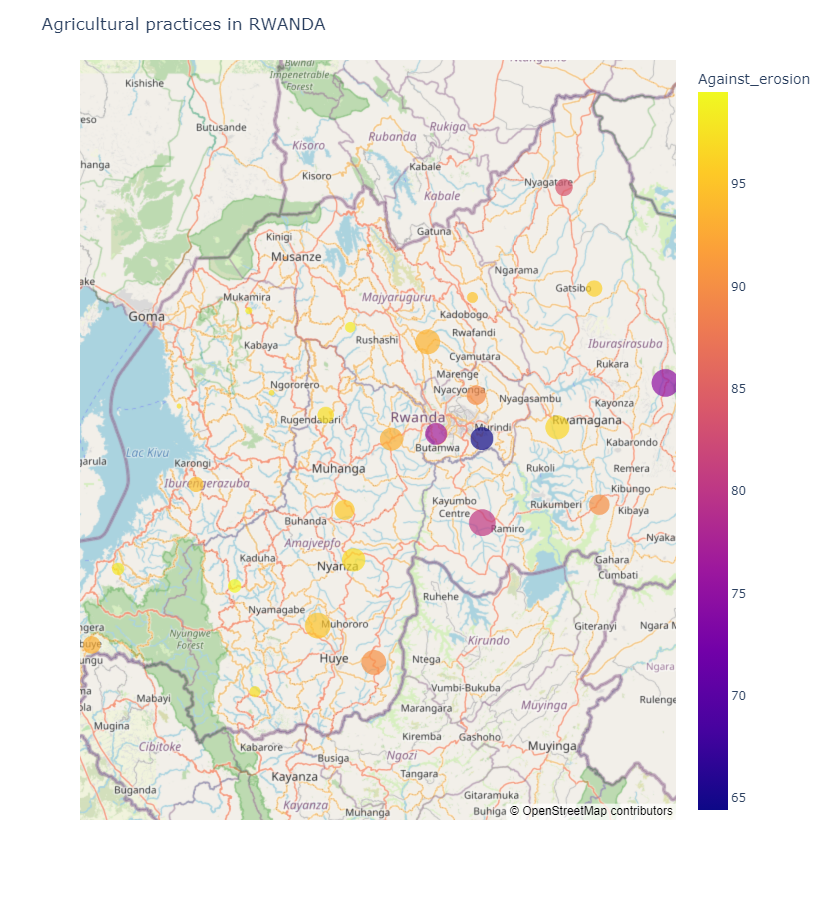

In [19]:
import plotly.express as px

fig = px.scatter_mapbox(
    merg,
    lat="lat",
    lon="lon",
    width=900,
    height=900,
    color="Against_erosion",
    hover_data=["Against_erosion", "Irrigation", "Agro_forestry"],
    size="Irrigation",  # Replace "Your_Size_Column" with the actual column name you want to use for bubble size
)

fig.update_layout(
    mapbox_style="open-street-map",
    title='Agricultural practices in RWANDA')
fig.show()



## ACTION3: Agricultural area

In [20]:
df3=frames[3]

df3 = df3.sort_values(by=['Season', 'Value'])



In [21]:
df3.head()

Agricultural area Season  Value
24             Temporarily meadow and pasture(,000Ha)      A     10
15   Agricultural land under Modern irrigated (,00...      A     27
6                     Percentage of agricultural area      A     59
21                      Temporary fallow land(,000Ha)      A     95
12              Area under permanent pasture (,000Ha)      A    135

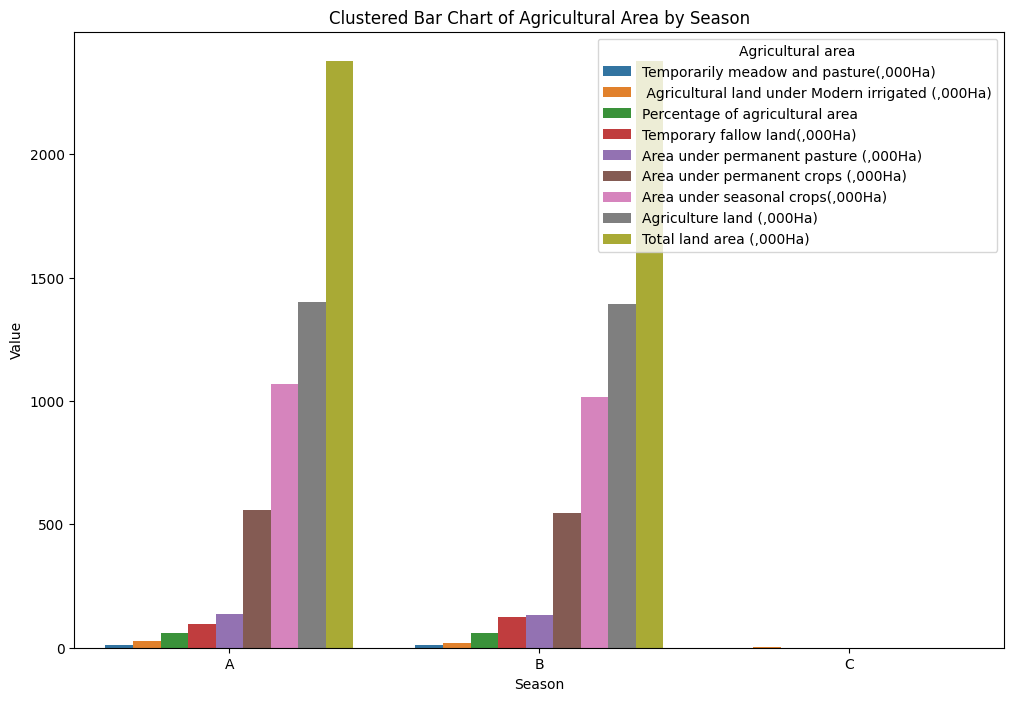

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df3
df = pd.DataFrame(df3)



# Use seaborn to create the clustered bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Season', y='Value', hue='Agricultural area', ci=None)

# Add title and labels
plt.title('Clustered Bar Chart of Agricultural Area by Season')
plt.xlabel('Season')
plt.ylabel('Value')

# Show the plot
plt.show()


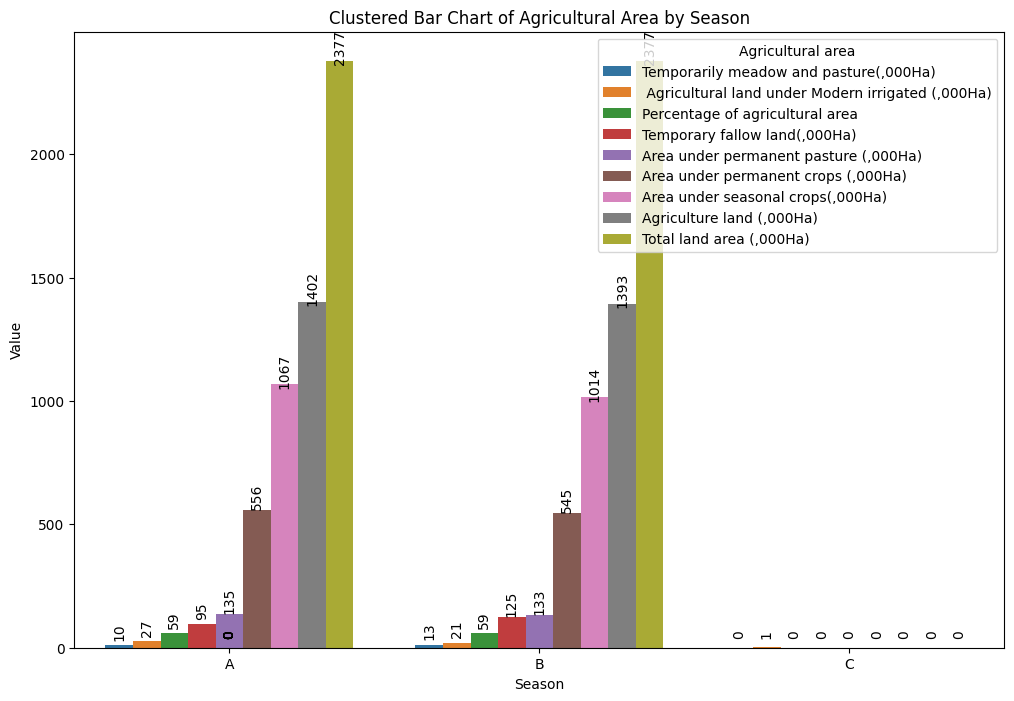

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named df3
df = pd.DataFrame(df3)

# Use seaborn to create the clustered bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='Season', y='Value', hue='Agricultural area', ci=None)

# Add text annotations to each vertical bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2., y + height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation='vertical', fontsize=10)

# Add title and labels
plt.title('Clustered Bar Chart of Agricultural Area by Season')
plt.xlabel('Season')
plt.ylabel('Value')

# Show the plot
plt.show()



In [24]:
df3.columns

Index(['Agricultural area', 'Season', 'Value'], dtype='object')